In [3]:
import re
import os
import time
import json
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Read the listings file
airbnb_listing = pd.read_csv("listings.csv")

# Three Questions

With this analysis I aim to asnwer three questions

1. How do different seasons of the year Influence bookings and prices?
2. What is the most popular area for bookings?
3. Can we build a reliable price prediction model?

In [2]:
airbnb_listing.head().T

,0,1,2,3,4
id,3191,15007,15077,15199,15285
name,Malleson Garden Cottage,Blaauwberg House,Top relaxed beach living in style,Self catering apartment,Waterford-Guinea Fowl Self Catering
host_id,3754,59072,59342,59694,59964
host_name,Brigitte,Dirk,Georg,Alexa,Chris+Alison
neighbourhood_group,NaN,NaN,NaN,NaN,NaN
neighbourhood,Ward 57,Ward 23,Ward 4,Ward 115,Ward 71
latitude,-33.94739,-33.80001,-33.85812,-33.91044,-34.03863
longitude,18.476,18.46063,18.49043,18.41239,18.43128
room_type,Entire home/apt,Entire home/apt,Private room,Entire home/apt,Entire home/apt
price,443,2458,1241,2500,1600


# 1. Exploratory Data Analysis

## 1.1 DataFrame Information

In [82]:
airbnb_listing.head(3).T

,0,1,2
id,3191,15007,15077
name,Malleson Garden Cottage,Blaauwberg House,Top relaxed beach living in style
host_id,3754,59072,59342
host_name,Brigitte,Dirk,Georg
neighbourhood_group,NaN,NaN,NaN
neighbourhood,Ward 57,Ward 23,Ward 4
latitude,-33.94739,-33.80001,-33.85812
longitude,18.476,18.46063,18.49043
room_type,Entire home/apt,Entire home/apt,Private room
price,443,2458,1241


In [4]:
airbnb_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16891 entries, 0 to 16890
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              16891 non-null  int64  
 1   name                            16891 non-null  object 
 2   host_id                         16891 non-null  int64  
 3   host_name                       16882 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   16891 non-null  object 
 6   latitude                        16891 non-null  float64
 7   longitude                       16891 non-null  float64
 8   room_type                       16891 non-null  object 
 9   price                           16891 non-null  int64  
 10  minimum_nights                  16891 non-null  int64  
 11  number_of_reviews               16891 non-null  int64  
 12  last_review                     

#### Observations from Information results

1. license and neighbourhood_group have no entries and need to be dropped becuase they will add no value
2. last_review  and reviews_per_month have a 3rd of the entries missing, the reviews per month can be salvaged however the last review one needs the missing entries to be dropped, which will also eliminate the reviews per month nulls                 

## 1.2 DataTypes

In [84]:
airbnb_listing.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                           float64
dtype: object

### Observations from DataTypes results

1. Most variables are integers and floats which is good for analysis and modelling, but there are objects that needs to be processed before they can be used, for example last review entries are dates but is reflected as an objects which means pandas date methods will not work on this variable. 

# 1.3 Summary Statistics

In [86]:
airbnb_listing.describe()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
count,1.689100e+04,1.689100e+04,0.0,16891.000000,16891.000000,16891.000000,16891.000000,16891.000000,12120.000000,16891.000000,16891.000000,16891.000000,0.0
mean,2.904747e+07,1.206950e+08,NaN,-33.962672,18.480244,2357.349831,4.278136,17.653603,0.907915,7.127168,223.738973,3.615890,NaN
std,1.515430e+07,1.161833e+08,NaN,0.101912,0.132010,5361.307131,14.718084,35.387835,1.923357,15.348729,121.589774,8.389602,NaN
min,3.191000e+03,3.754000e+03,NaN,-34.264400,18.319410,120.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000,NaN
25%,1.617218e+07,2.667230e+07,NaN,-34.032105,18.403390,679.000000,1.000000,0.000000,0.110000,1.000000,117.000000,0.000000,NaN
50%,2.977812e+07,7.434676e+07,NaN,-33.933790,18.435670,1114.000000,2.000000,3.000000,0.380000,2.000000,261.000000,0.000000,NaN
75%,4.210266e+07,1.924712e+08,NaN,-33.910430,18.488725,2200.000000,3.000000,18.000000,1.050000,5.000000,336.000000,3.000000,NaN
max,5.300108e+07,4.289210e+08,NaN,-33.573530,18.941040,175500.000000,550.000000,536.000000,51.880000,101.000000,365.000000,148.000000,NaN


#### Key Observations from the stats

1. Highest amount Paid for a stay is R 175,550 for a stay of 1.5 Years.
2. Minimum amount paid for a stay is R120 (Needs to be explored further)
3. There is a property with zero availability for the entire year (booked out). 

## 1.4 Missing Data

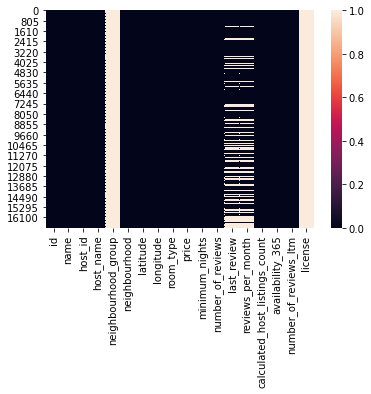

In [80]:
sns.heatmap(airbnb_listing.isnull());

We can note that 2 columns have no entries; neighborhood_group and license. And also 2 columns have some correspondong missing entries last_review and reviews_per_month

# 1.7 Cape Town Stay Length Heat Map

In [262]:
# Import the plotting package Folium and the heatmap plugin
import folium
from folium.plugins import HeatMap


# Create a map subset of the dataset with coordinates
map_data = airbnb_listing[['latitude', 'longitude', 'minimum_nights']]

# Anchor the map at one of the locations in cape town and start at zoom 6
mapObj = folium.Map([-22.94739, 18.47600], zoom_start= 6)

# Create layer
HeatMap(map_data).add_to(mapObj)

# Save the heatmap as an html file
mapObj.save('capetown_output.html')

# 2. Modelling

# 2.0 Drop missing entries

In [161]:
# Drop the Columns that have 100% missing entries before the Modelling starts
airbnb_listing.drop(['license', 'neighbourhood_group'], axis=1, inplace=True)

# Since Both last_review and Reviews per month have a 3rd missing entries, 
#I will drop the last_view since is a date entry and that will also take care of the reviews 
# per month missing entries because they correspond

airbnb_listing = airbnb_listing.dropna()

In [228]:
airbnb_listing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12116 entries, 0 to 16787
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              12116 non-null  int64  
 1   name                            12116 non-null  object 
 2   host_id                         12116 non-null  int64  
 3   host_name                       12116 non-null  object 
 4   neighbourhood                   12116 non-null  object 
 5   latitude                        12116 non-null  float64
 6   longitude                       12116 non-null  float64
 7   room_type                       12116 non-null  object 
 8   price                           12116 non-null  int64  
 9   minimum_nights                  12116 non-null  int64  
 10  number_of_reviews               12116 non-null  int64  
 11  last_review                     12116 non-null  object 
 12  reviews_per_month               

## 2.1 Feature Engineering

In [176]:
def get_year(date):
    """
    takes in a date in the format yyyy-mm-dd
    and return yyyy as a string
    
    """
    
    return (str(date).split("-"))[0]


def get_month(date):
    """
    takes in a date in the format yyyy-mm-dd
    and return mm as a string
    
    """
    return (str(date).split("-"))[1]

def year_season(month):
    """
    Takes in month as an integer
    and it return which South African season of the 
    it falls under
    
    """
    if month >= 3 and month <= 5:
        return "Autum"
    
    elif month >= 6 and month <= 8:
        return "Winter"
    
    elif month >= 9 and month <= 11:
        return "Spring"
    else:
        return "Summer"

In [163]:
airbnb_listing.head(2)

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,year
0,3191,Malleson Garden Cottage,3754,Brigitte,Ward 57,-33.94739,18.47600,Entire home/apt,443,3,54,2020-02-05,0.56,1,319,0,2020
1,15007,Blaauwberg House,59072,Dirk,Ward 23,-33.80001,18.46063,Entire home/apt,2458,2,30,2018-02-11,0.63,2,168,2,2018


In [166]:
# Create a list of results becuase pandas does not allow creating new named columns directly anymore
years = list(airbnb_listing.last_review.apply(get_year))
months = list(airbnb_listing.last_review.apply(get_month))
seasons = list(airbnb_listing.month.apply(year_season))


# Assign lists as new columns in the dataframe
airbnb_listing['year'] = years
airbnb_listing['month'] = months
airbnb_listing['season'] = seasons

# Convert new column to integers becuase the function returned strings
airbnb_listing.month = airbnb_listing.month.astype(str).astype(int)
airbnb_listing.year = airbnb_listing.year.astype(str).astype(int)

### 2.1.1 Bookings by Seasons

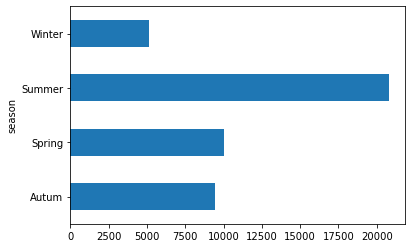

In [186]:
# We can note that different Seasons have different stay lengths. Winter have shorter stays than Summer as expected

airbnb_listing.groupby('season')['minimum_nights'].sum().plot(kind = 'barh');

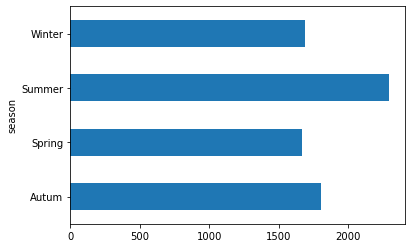

In [185]:
# Investigate Associated prices by season the relationship is similar to the analysis above, it makes sense that longer stays 
# Require more money to be paid

airbnb_listing.groupby('season')['price'].mean().plot(kind = 'barh');

In [227]:
# Lets check the Average Price by Season

airbnb_listing.groupby('season')['price'].mean()#

season
Autum     1807.897998
Spring    1665.660853
Summer    2295.206209
Winter    1690.033535
Name: price, dtype: float64

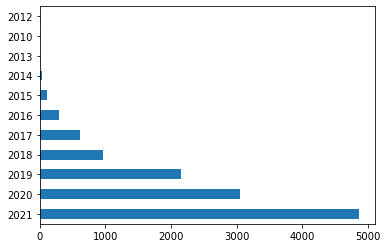

In [169]:
# Part of understing the data we have know to the year range for the dataset

airbnb_listing.year.value_counts().plot(kind = 'barh');

### 2.1.2 Popular Areas

In [194]:
neighbor = airbnb_listing[['neighbourhood', 'minimum_nights', 'availability_365', 'price', 'room_type']]

# Export this file to change columns names in excel
neighbor.groupby('neighbourhood')['neighbourhood'].count().to_csv('neighbors.csv', index=True)

In [207]:
# Import the file with correct column names
neighbors = pd.read_csv("neighbors.csv")
neighbors.head()

,neighbourhood,Count
0,Ward 115,2385
1,Ward 54,1659
2,Ward 77,819
3,Ward 23,688
4,Ward 64,678


In [208]:
total_bookings = sum(neighbors.Count)
total_bookings

12116

In [216]:
# Calculate the percentage of bookings by ward
booking_fraction = list((neighbors.Count/total_bookings)*100)

neighbors['booking_fraction'] = booking_fraction

In [219]:
neighbors.head()

,neighbourhood,Count,booking_fraction
0,Ward 115,2385,19.684714
1,Ward 54,1659,13.692638
2,Ward 77,819,6.759657
3,Ward 23,688,5.678442
4,Ward 64,678,5.595906


### Ward 115

This Ward includes areas located close to the Beach, and areas that tourist attractions, so it makes sense that is has the majority of the bookins from Cape Town. Suburbs located in Ward 115 to name a few are:

* Cape Town city centre 
* Waterfront
* Woodstock
* Green point

The data below is sourced from https://wazimap.co.za/profiles/ward-19100115-city-of-cape-town-ward-115-19100115/ it shows the type of building located in Ward 115, from the top right graph it shows that 58% of buildings in Ward 115 are apartments typical for renting out on Airbnb.

![image](Images\Ward_115.png)

## 2.1 Feature Engineering (Dependant Variables)

In [105]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [44]:
airbnb_listing.head(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,3191,Malleson Garden Cottage,3754,Brigitte,NaN,Ward 57,-33.94739,18.47600,Entire home/apt,443,3,54,2020-02-05,0.56,1,319,0,NaN
1,15007,Blaauwberg House,59072,Dirk,NaN,Ward 23,-33.80001,18.46063,Entire home/apt,2458,2,30,2018-02-11,0.63,2,168,2,NaN


In [229]:
# Instantiate the encoder
label_encoder = LabelEncoder()

In [233]:
# Because there many different Wards one hot encoding will create a large sparse matrix
# The better strategy to encode this column to an integer is using a label encoder

# This method fits the encoder to data and transforms the entries to new encoded values that are machinet interpretable
# I am assigning the entries to list
neighbourhood_code = list(label_encoder.fit_transform(airbnb_listing.neighbourhood))

In [239]:
# Create a new column and assign the values in the list to the new column
airbnb_listing['ward_code'] = neighbourhood_code

In [240]:
airbnb_listing.head()

,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,year,month,season,ward_code
0,3191,Malleson Garden Cottage,3754,Brigitte,Ward 57,-33.94739,18.47600,Entire home/apt,443,3,54,2020-02-05,0.56,1,319,0,2020,2,Summer,48
1,15007,Blaauwberg House,59072,Dirk,Ward 23,-33.80001,18.46063,Entire home/apt,2458,2,30,2018-02-11,0.63,2,168,2,2018,2,Summer,27
2,15077,Top relaxed beach living in style,59342,Georg,Ward 4,-33.85812,18.49043,Private room,1241,5,5,2013-01-06,0.06,5,292,0,2013,1,Summer,34
3,15199,Self catering apartment,59694,Alexa,Ward 115,-33.91044,18.41239,Entire home/apt,2500,14,2,2016-04-15,0.02,1,365,0,2016,4,Autum,14
4,15285,Waterford-Guinea Fowl Self Catering,59964,Chris+Alison,Ward 71,-34.03863,18.43128,Entire home/apt,1600,2,9,2015-05-04,0.08,3,286,1,2015,5,Autum,64


In [241]:
# Create a subset dataset of integers and floats
model_data = airbnb_listing[['minimum_nights', 'number_of_reviews', 'reviews_per_month',
                              'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 
                             'price', 'year', 'month','ward_code' ]]


# Create a dataframe of dependant variables
X_variables = model_data.drop(['price'], axis=1)

# This is our models target variable
target_variable = model_data['price']

In [257]:
# Inspect the head of the dataframe
model_data.head().T

,0,1,2,3,4
minimum_nights,3.00,2.00,5.00,14.00,2.00
number_of_reviews,54.00,30.00,5.00,2.00,9.00
reviews_per_month,0.56,0.63,0.06,0.02,0.08
calculated_host_listings_count,1.00,2.00,5.00,1.00,3.00
availability_365,319.00,168.00,292.00,365.00,286.00
number_of_reviews_ltm,0.00,2.00,0.00,0.00,1.00
price,443.00,2458.00,1241.00,2500.00,1600.00
year,2020.00,2018.00,2013.00,2016.00,2015.00
month,2.00,2.00,1.00,4.00,5.00
ward_code,48.00,27.00,34.00,14.00,64.00


# 2.2 Split Train Test

In [258]:
# Import Regression model and split the dataset
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [259]:
# Split the data inot training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(X_variables, target_variable, test_size=0.2, random_state=0)

# Instantiate the model and fit/train the model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [256]:
# This dataframe gives an in indication of the influence of the variable in predicting the prices
coeff_df = pd.DataFrame(regressor.coef_, X_variables.columns, columns=['Coefficient'])
coeff_df

,Coefficient
minimum_nights,6.054187
number_of_reviews,-5.081061
reviews_per_month,-33.546440
calculated_host_listings_count,16.167856
availability_365,-0.137489
number_of_reviews_ltm,-6.085110
year,-90.615874
month,-46.059288
ward_code,13.817257


# Interpreting the Coefficients table

1. An increase in 1 night of stay has a 6 unit increase in  price
2. A 1 unit increase in number_of_reviews decreases the price by 5 units
3. A 1 unit increase in reviews_per_month has a deacrease in price  33 units. And so forth

## 2.3 Model Evaluation

In [263]:
from sklearn import metrics

### 2.3.1 Mean Square Error

The mean square error is the sum of the squared differences between the prediction ($\hat{y}$) and the expected ($y$).  MSE values are not of a particular unit.  If an MSE value has decreased for a model, that is good.  However, beyond this, there is not much more you can determine.  Low MSE values are desired.

$ \mbox{MSE} = \frac{1}{n} \sum_{i=1}^n \left(\hat{y}_i - y_i\right)^2 $

 Source: https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_04_3_regression.ipynb

In [248]:
# Predict
y_pred = regressor.predict(X_test)

# Measure MSE error.  
score = metrics.mean_squared_error(y_pred,y_test)
print("Final score (MSE): {}".format(score))

Final score (MSE): 8400982.84061415


### 2.3.2 Root Mean Square Error

The root mean square (RMSE) is essentially the square root of the MSE.  Because of this, the RMSE error is in the same units as the training data outcome. Low RMSE values are desired.

$ \mbox{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n \left(\hat{y}_i - y_i\right)^2} $

Source: https://github.com/jeffheaton/t81_558_deep_learning/blob/master/t81_558_class_04_3_regression.ipynb

In [249]:
# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(y_pred,y_test))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 2898.4449003929935


Using both Mean Square Error and Root Mean Square Error, it can be noted that both these metrics have very high values whereas lower values are desired. This model is not reliable